## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
! pip install statannotations
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
import sys
import os
from scipy.stats import mannwhitneyu
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../..']

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu
from src.utils import visualization_utils
from statannotations.Annotator import Annotator

In [5]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.autolayout'] = True

DEFAULT_FIGURE_CONFIG = {
    "figsize": (10, 10),
    "xtick.labelsize": 18,
    "ytick.labelsize": 18    
}




In [6]:
df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240312/prelim_exam/host_multi_all_models_evaluation_metrics.csv"))
df.drop(columns="Unnamed: 0", inplace=True)
df

,itr,experiment,auprc
0,0,CNN,0.615186
1,1,CNN,0.611248
2,2,CNN,0.592894
3,3,CNN,0.548679
4,4,CNN,0.594882
5,0,LSTM,0.609153
6,1,LSTM,0.619420
7,2,LSTM,0.647563
8,3,LSTM,0.607311
9,4,LSTM,0.592242


In [7]:
pairs = [("VirProBERT", "ProteinBERT"),
        ("VirProBERT", "Transformer-Encoder"),
        ("VirProBERT", "LSTM"),
        ("VirProBERT", "CNN")]
virprobert_values = df[df["experiment"] == "VirProBERT"]["auprc"].values
proteinbert_values = df[df["experiment"] == "ProteinBERT"]["auprc"].values
cnn_values = df[df["experiment"] == "CNN"]["auprc"].values
lstm_values = df[df["experiment"] == "LSTM"]["auprc"].values
tf_enc_values = df[df["experiment"] == "Transformer-Encoder"]["auprc"].values

In [8]:
p_values = [mannwhitneyu(virprobert_values, proteinbert_values, alternative="two-sided").pvalue,
            mannwhitneyu(virprobert_values, tf_enc_values, alternative="two-sided").pvalue,
            mannwhitneyu(virprobert_values, lstm_values, alternative="two-sided").pvalue,
            mannwhitneyu(virprobert_values, cnn_values, alternative="two-sided").pvalue]

In [9]:
p_values

[0.02157174794772092,
 0.012185780355344813,
 0.012185780355344813,
 0.012185780355344813]

In [10]:
formatted_pvalues= [f"p={p_value:.2e}" for p_value in p_values]
print(formatted_pvalues)
from statannotations.Annotator import Annotator

['p=2.16e-02', 'p=1.22e-02', 'p=1.22e-02', 'p=1.22e-02']


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ProteinBERT vs. VirProBERT: Custom statistical test, P_val:2.157e-02
Transformer-Encoder vs. VirProBERT: Custom statistical test, P_val:1.219e-02
LSTM vs. VirProBERT: Custom statistical test, P_val:1.219e-02
CNN vs. VirProBERT: Custom statistical test, P_val:1.219e-02


<Figure size 432x288 with 0 Axes>

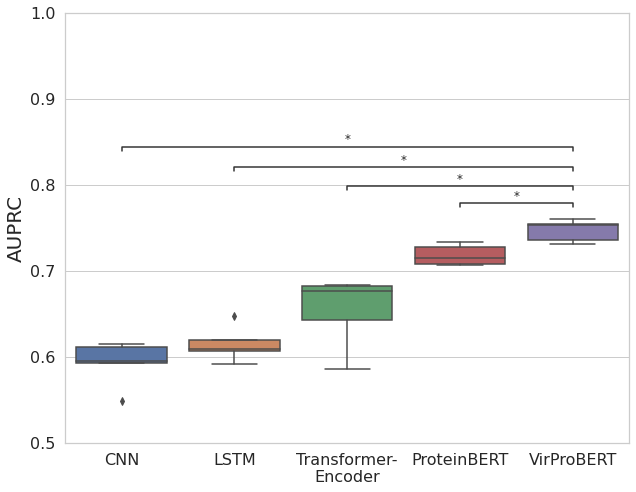

In [15]:
DEFAULT_FIGURE_CONFIG = {
    "figsize": (9, 7),
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
}

plotting_parameters = {
    'data':    df,
    'x':       'experiment',
    'y':       'auprc',
    'palette': "deep"
}

visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
ax = sns.boxplot(**plotting_parameters)
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(p_values)
annotator.set_pvalues(p_values)
#annotator.configure(test="Mann-Whitney")
ax.set_xlabel("", size=20, labelpad=5)
ax.set_ylabel("AUPRC", size=20)
plt.xticks(rotation=45)
visualization_utils.wrap_xticklabels(ax)
#annotator.apply_and_annotate()
annotator.annotate()
ax.set_ylim(0.5, 1)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/visualization/prelim_exam/host_multi_all_models_auprc_boxplot.pdf"), bbox_inches="tight")
plt.show()